## Lab1 for MSDS7331 Machine learning I
#### Sept 10th, 2019
### Joe Jiang, Kenneth Richardson and Stacey Smith 

## 1. Business Understanding

### The credit card default dataset was collected in Taiwan to predict credit card default using 30,000 customer's profile and their transaction information. The outcome of dataset is measured by the default status of customers. The ability to correctly predict which customers is going to default  is critically important for both the customer's and credit card issuers' financial bottomline. For the customers, credit card default is one of the most common causes for low credit scores, which would severely impact their ability to obtain credit in the future, such as car loans and house mortgages. For the credit card issuers, default usually results in eventual write-off the charge and total financial loss. So it is in both card holder and issuers interest to correctly predcit the customer's default status so proper intervention can be targeted to lower the default rate.
### In this project, we will generate and compare several models to predict the default probability of credit card holders. The models will be comapred for their overall accuracy, precision and recall rate. We will also compare the model's AUC scores to measure their robustness for predicting the customer's default status. On the other hand, we will measure the variable importance scores of the models and provide credit card issuers with critical business intelligence to better help their clients.    

## 2. Data Types
### The dataset contains 30,000 customers, including their credit limit, their profiles (sex, age and marriage status) and their credit card transaction information from the past 6 months, including their history of payments (past due status and monthly payments) and monthly bill statements. The target is the default status of the customers. The detail of attibutes and target are listed below (customer ID is omitted):

    1. 'LIMIT_BAL', credit card limit (numeric, int)
    2. 'SEX', customer gender, male = 1, female = 2 (categorical)
    3. 'EDUCATION', customers' eduaction, graduate school = 1, college = 2, high school = 3, other = 4 (categorical)
    4. 'MARRIAGE', customer's marriage status, married =1, single =2, other =3 (categorical)
    5. 'AGE', customer's age (numeric, int)
    6. 'PAY_0', payment record (Sept, 2005, -1 to 9 indicate payment delayed by months) (nominal, int)
    7. 'PAY_2', payment record (Aug, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
    8. 'PAY_3', payment record (Jul, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
    9. 'PAY_4', payment record (Jun, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
    10. 'PAY_5', payment record (May, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
    11. 'PAY_6', payment record (Apr, 2005, -1 to 9 indicate payment delayed by months)(nominal, int)
    12. 'BILL_AMT1', monthly bill amount (Sept, 2005) (numeric, int)
    13. 'BILL_AMT2', monthly bill amount (Aug, 2005) (numeric, int)
    14. 'BILL_AMT3', monthly bill amount (Jul, 2005) (numeric, int)
    15. 'BILL_AMT4', monthly bill amount (Jun, 2005) (numeric, int)
    16. 'BILL_AMT5', monthly bill amount (May, 2005) (numeric, int) 
    17. 'BILL_AMT6', monthly bill amount (Apr, 2005) (numeric, int)
    18. 'PAY_AMT1', monthly payment (Sept, 2005) (numeric, int)
    19. 'PAY_AMT2', monthly payment (Aug, 2005) (numeric, int)
    20. 'PAY_AMT3', monthly payment (Jul, 2005) (numeric, int)
    21. 'PAY_AMT4', monthly payment (Jun, 2005) (numeric, int)
    22. 'PAY_AMT5', monthly payment (May, 2005) (numeric, int)
    23. 'PAY_AMT6', monthly payment (Apr, 2005) (numeric, int)
    24. 'default', default ststus of the card holder (yes =1, no = 0)

In [73]:
#Better to install within Anaconda, but can install within the notebook.
#pip install pandas_profiling

In [1]:
#first import the necessary pyhton libraries, in particular, seaborn and matplotlib for visualization 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas_profiling
import warnings
warnings.filterwarnings('ignore') #Suppress the Warnings

In [2]:
#cd lab1

In [3]:
#import the default credit card dataset
data_df = pd.read_excel("default of credit card clients.xls", header=1)

In [76]:
#number of attributes and records (sample size)
data_df.shape

(30000, 25)

In [77]:
#Attribute and target names, note that ID is removed from the dataset later on
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [78]:
#first ten rows of the data
data_df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [80]:
# A quick check for potential missing data --- no missing data?
del data_df['ID']
data_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [81]:
# Check data types --- all numerical int type, some casting is necessary for categorical features
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [56]:
pandas_profiling.ProfileReport(data_df)

Number of variables,24
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,5.5 MiB
Average record size in memory,192.0 B
Numeric,17
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


In [57]:
profile = pandas_profiling.ProfileReport(data_df)
profile.to_file(outputfile="data_analysis.html")

In [82]:
#rename the repsonse/target variable
data_df.rename(columns = {'default payment next month':'default'}, inplace = True)

## 3. Data Quality and Simple Statistics

### Although initial quick check of the dataset indicated that there are no missing values, a more detailed examination by looking at some simple statistics of dataset indicated that there are several issues need to be addressed, including discrepency in terms of number of subcategories of some categorical features and potential outliers for numerical features

In [83]:
# Simple statistics of the dataset
data_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [60]:
#education and marriage features contain more subcategories than originally described, combined some subcategories
data.groupby(by=data.MARRIAGE).count() # Category 0 is not described, we will combine it with other = 3)
data.MARRIAGE = data.MARRIAGE.replace(to_replace = 0, value = 3)
data.groupby(by=data.EDUCATION).count() # Category 0, 5, 6 ARE not described, we will combine it with other = 4)
data.EDUCATION = data.EDUCATION.replace(to_replace = (0, 5, 6), value = 4)

In [61]:
#data.MARRIAGE

In [62]:
# For payment history, PAY_0 to PAY_6 have value -2 which is not in the original description, we combined it with -1 and assigned 0
data.groupby(by=data.PAY_0).count() # Category 0 is not described, we will combine it with other = 3)
data.PAY_0 = data.PAY_0.replace(to_replace = (-1, -2), value = 0)
data.PAY_2 = data.PAY_2.replace(to_replace = (-1, -2), value = 0)
data.PAY_3 = data.PAY_3.replace(to_replace = (-1, -2), value = 0)
data.PAY_4 = data.PAY_4.replace(to_replace = (-1, -2), value = 0)
data.PAY_5 = data.PAY_5.replace(to_replace = (-1, -2), value = 0)
data.PAY_6 = data.PAY_6.replace(to_replace = (-1, -2), value = 0)

## 4. Visualize Attributes

In [84]:
# Overall default rate
data_df.default.sum()/data_df.default.count()

0.2212

### We chose to visualize the sex of the population. We noticed there are visually more males with loans.

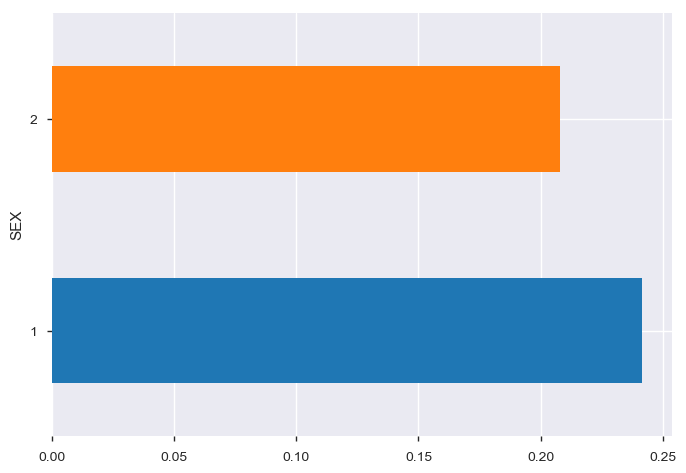

In [91]:
# Default rate by gender
data_grouped_df = data_df.groupby(by=data_df.SEX)
default_rate_df = data_grouped_df.default.sum()/data_grouped_df.default.count()
default_rate_df.plot(kind='barh')

### There education of the population are roughly normally distrubuted. There is noticably lesser individuals labled as other with a back account.

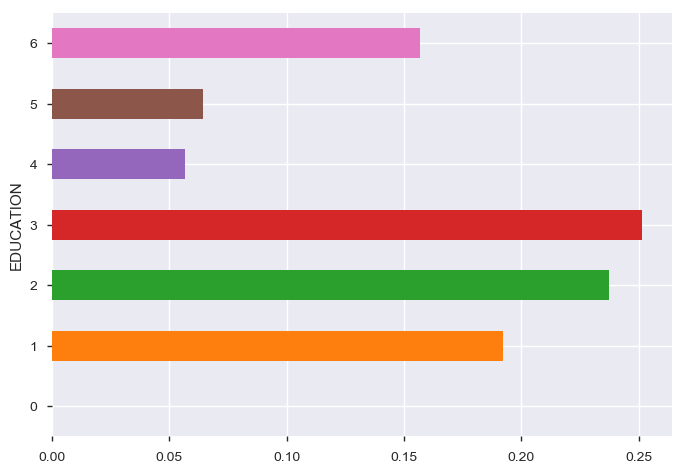

In [92]:
data_grouped_df = data_df.groupby(by=data_df.EDUCATION)
default_rate_df = data_grouped_df.default.sum()/data_grouped_df.default.count()
default_rate_df.plot(kind='barh')

### Marriage is visually normally distributed.

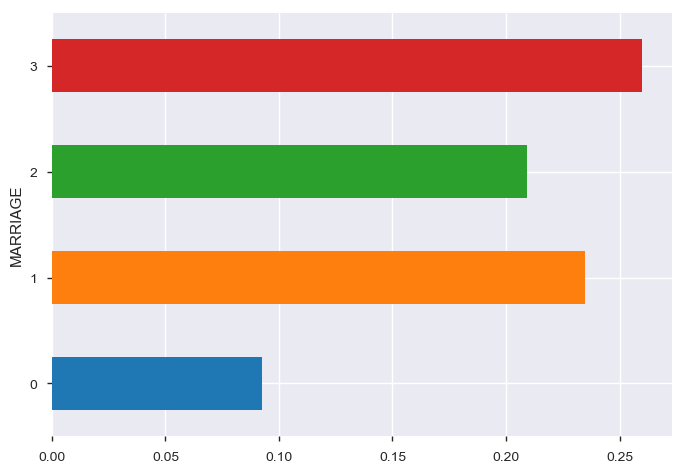

In [93]:
data_grouped_df = data_df.groupby(by=data_df.MARRIAGE)
default_rate_df = data_grouped_df.default.sum()/data_grouped_df.default.count()
default_rate_df.plot(kind='barh')

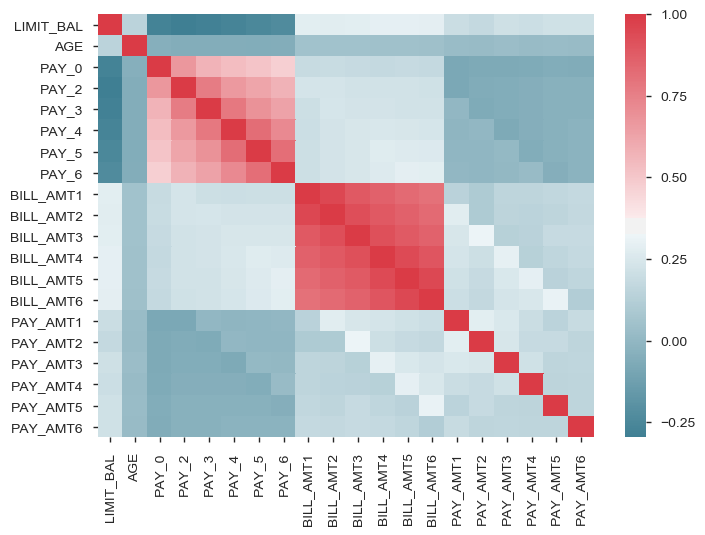

In [94]:
# casting the following four features as categorical
categorical_features = ['SEX', 'EDUCATION','MARRIAGE','default']
data_df[categorical_features] = data_df[categorical_features].astype('category')

corr = data_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap = cmap)

## 6. Explore Joint Attributes

### From the Pandas Profiling output report, we noticed there's a high correlation of bill amounts from to month.


![title](images/over_view.png)

## From the Pearson correlation plot,  we also noticed there's a negative correlation between Marriage and Age.

![title](images/pearson_correlation.png)

## 7. Explore Attributes and Class
### We noticed the mean of the monthly payment amounts averaged around 5000 dollars, we know that's not the typical payment amount, and if that was true, the default rate would be a lot lower.  We also noticed the mean of the limit value is high. There are potential outliers that must be dealt with.

In [68]:
data_df.mean(axis = 0)

LIMIT_BAL    167484.322667
SEX               1.603733
EDUCATION         1.842267
MARRIAGE          1.557267
AGE              35.485500
PAY_0             0.356767
PAY_2             0.320033
PAY_3             0.304067
PAY_4             0.258767
PAY_5             0.221500
PAY_6             0.226567
BILL_AMT1     51223.330900
BILL_AMT2     49179.075167
BILL_AMT3     47013.154800
BILL_AMT4     43262.948967
BILL_AMT5     40311.400967
BILL_AMT6     38871.760400
PAY_AMT1       5663.580500
PAY_AMT2       5921.163500
PAY_AMT3       5225.681500
PAY_AMT4       4826.076867
PAY_AMT5       4799.387633
PAY_AMT6       5215.502567
default           0.221200
dtype: float64

In [95]:
from sklearn.decomposition import PCA
y = data_df['default'] 
x = data_df.drop(['default'],axis=1)
x_continuous = x.drop(["SEX", "EDUCATION", 'MARRIAGE'], axis =1)

# Standardize the continuous features before principal component analysis 

x_normalized = (x_continuous-x_continuous.mean())/x_continuous.std()


pca = PCA(n_components = 4)
X_pca = pca.fit(x_normalized).transform(x_normalized)

In [96]:
pc = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc['default'] = y

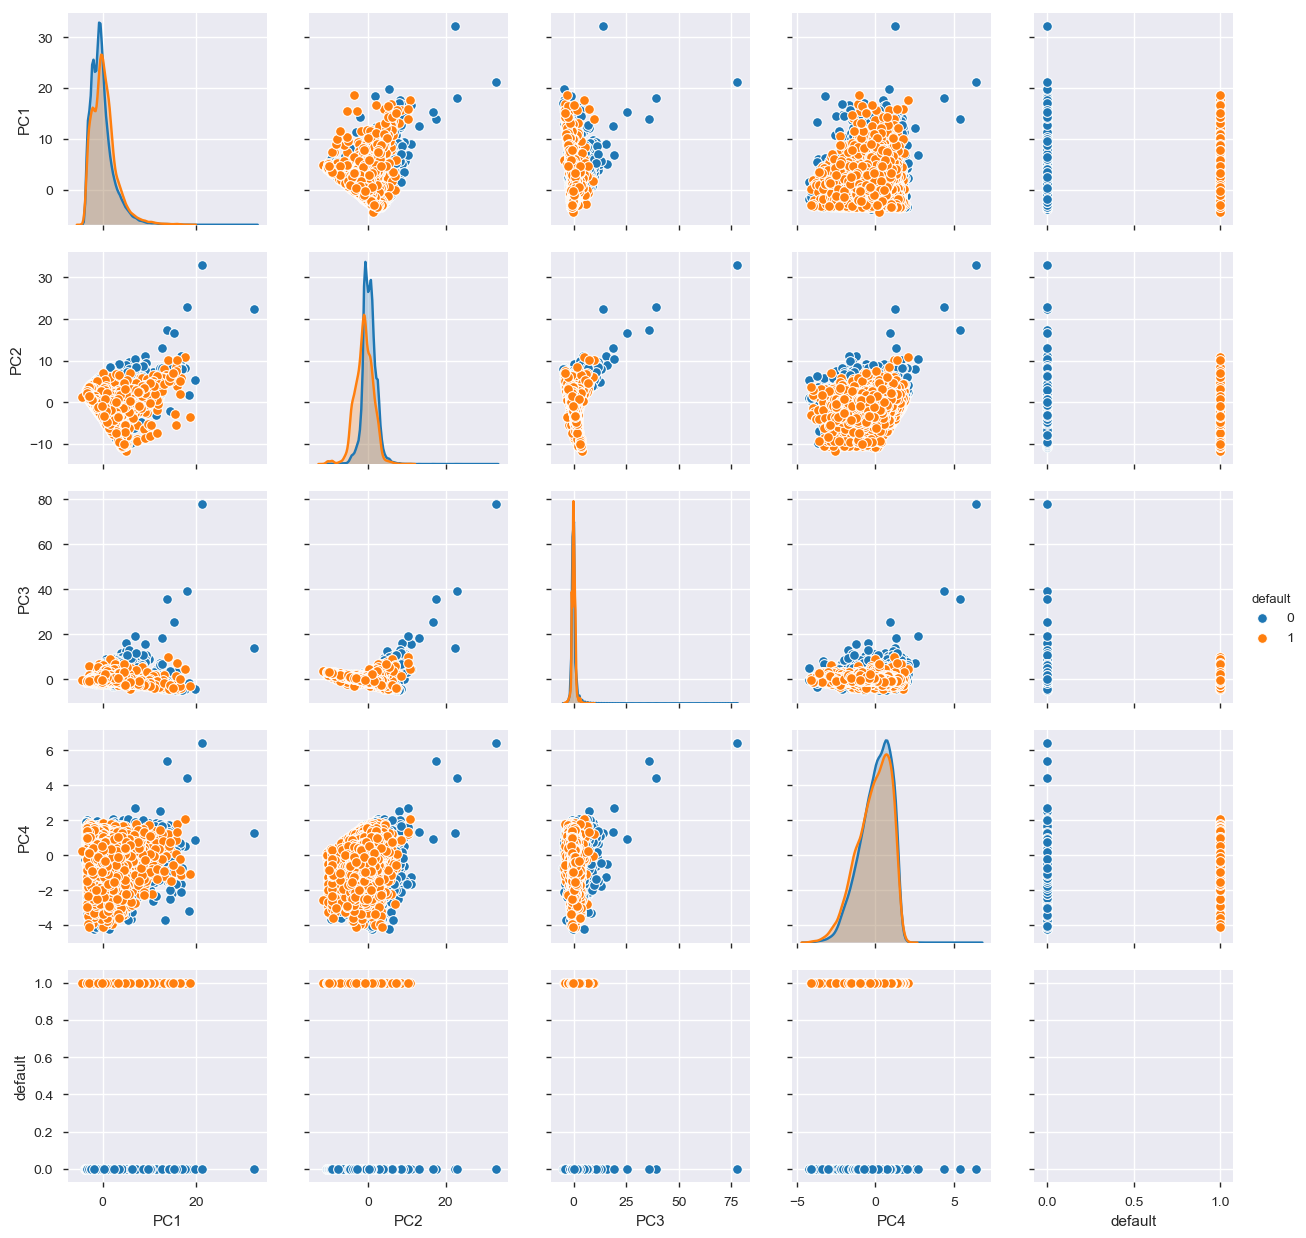

In [97]:
sns.pairplot(pc, hue = 'default')